In [0]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd
import glob
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


#! git clone https://bitbucket.org/lidiiiaasanchez//content/drive/My Drive/Colab Notebooks.git
#import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/funcionesSepsis.ipynb')
#from funcionesSepsis import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
clean_patients = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CleanPatients.csv")
del clean_patients[("Unnamed: 0")]

In [0]:
clean_patients.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Outcome,IdPaciente
0,105.0,97.0,37.72,105.0,64.0,48.0,15.0,0.0,2.600000,28.333333,0.4,7.372000,51.000000,92.8,0.0,15.666667,0.0,8.000,106.666667,1.300,0.0,113.285714,1.300000,1.933333,3.133333,3.833333,0.0,0.0,29.670588,10.600,34.166667,9.664706,405.250,76.529412,27.92,1,0.0,0.0,-0.03,53,0,0,0
1,106.0,98.0,37.72,102.0,62.0,47.0,19.0,0.0,3.400000,28.555556,0.4,7.378000,51.000000,90.7,0.0,15.777778,0.0,8.000,106.777778,1.300,0.0,110.857143,1.300000,1.922222,3.055556,3.855556,0.0,0.0,29.347059,10.500,34.311111,9.576471,408.875,75.352941,27.92,1,0.0,0.0,-0.03,54,0,0,0
2,100.0,100.0,37.33,129.0,87.0,68.0,21.0,0.0,6.157895,28.600000,0.5,7.424737,47.526316,98.0,0.0,21.640000,0.0,7.524,104.760000,1.124,0.0,115.440000,1.182716,2.124000,3.192000,3.036000,0.0,0.0,25.424000,8.836,30.014286,8.828000,579.250,106.040000,27.92,1,0.0,0.0,-0.03,101,0,0,0
3,110.0,99.0,37.83,141.0,89.0,70.0,17.0,0.0,-1.000000,25.000000,0.4,7.380000,38.000000,98.0,0.0,22.000000,0.0,7.700,107.000000,0.900,0.0,143.000000,1.028395,2.100000,2.000000,3.600000,0.0,0.0,26.500000,9.100,29.121429,7.200000,669.875,175.000000,27.92,1,0.0,0.0,-0.03,126,0,0,0
4,123.0,99.0,38.00,134.0,79.0,120.0,18.0,0.0,2.300000,27.520000,0.4,7.363500,49.900000,98.0,0.0,20.320000,0.0,7.784,105.320000,0.900,0.0,119.480000,0.898765,2.016000,2.672000,3.825000,0.0,0.0,25.576000,8.764,28.371429,8.796000,746.000,272.440000,27.92,1,0.0,0.0,-0.03,147,0,0,0


In [0]:
X = clean_patients[["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente"]]

y = clean_patients[["Outcome"]]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,train_size=0.7, random_state=1, shuffle=False)

In [0]:
#Estandarizamos los subconjuntos teniendo en cuenta que para el test usaremos la media y desviación tipica de train 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

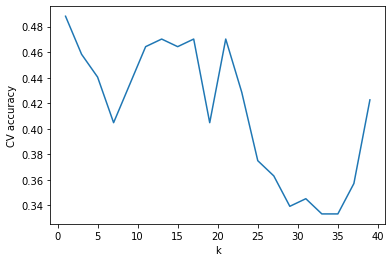

El parámetro k óptimo es: 1


In [0]:
#Buscamos el parámetro libre k óptimo

k_values = range(1,41,2) #Rango de valores de k
cv_k_scores=[] 

for f in k_values:
    neigh = KNeighborsClassifier(n_neighbors=f)
    scores = cross_val_score(neigh, X_train_transformed, y_train, cv=7)
    cv_k_scores.append(scores.mean())

plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

k_optimo = np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())]
print('El parámetro k óptimo es:', k_optimo)

In [0]:
#Generamos el modelo
neigh = KNeighborsClassifier(n_neighbors=k_optimo)
neigh.fit(X_train_transformed, y_train)
pred_neigh = neigh.predict(X_test_transformed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
print('Accuracy of logistic K-NN classifier on test set: {:.4f}'.format(neigh.score(X_test_transformed, y_test)))

print('Accuracy of logistic K-NN cross-validation on test set: {:.4f}'.format(np.array(cv_k_scores).max()))

Accuracy of logistic K-NN classifier on test set: 0.5417
Accuracy of logistic K-NN cross-validation on test set: 0.5702


In [0]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_neigh)
print(confusion_matrix)

[[27  5]
 [ 2 38]]


In [0]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP /(VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

La tasa de acierto del test es de: 0.9027777777777778
La sensibilidad del test es de: 0.95
La especificidad de acierto es de: 0.84375


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

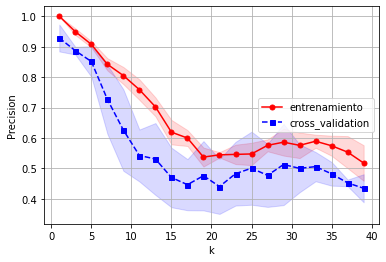

In [0]:
train_scores, cv_scores = validation_curve(neigh, X_train_transformed, y_train, param_name='n_neighbors', param_range=np.arange(1,41,2), cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)
cv_scores_std = np.std(cv_scores, axis=1)

# graficando las curvas
plt.plot(np.arange(1,41,2), train_scores_mean, color='r', marker='o', markersize=5, label='entrenamiento')
plt.fill_between(np.arange(1,41,2), train_scores_mean + train_scores_std, train_scores_mean - train_scores_std, alpha=0.15, color='r')
plt.plot(np.arange(1,41,2), cv_scores_mean, color='b', linestyle='--', marker='s', markersize=5, label='cross_validation')
plt.fill_between(np.arange(1,41,2), cv_scores_mean + cv_scores_std, cv_scores_mean - cv_scores_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('k')
plt.ylabel('Precision')
plt.show()

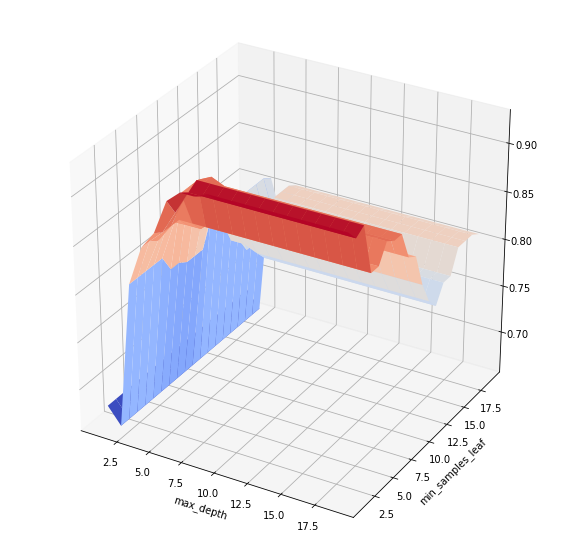

In [0]:
#Arbol#Generamos el modelo
tree = DecisionTreeClassifier(max_depth=2,min_samples_leaf=18)
tree.fit(X_train_transformed, y_train)
pred_tree = tree.predict(X_test_transformed)
max_depth = range(1,20)
min_samples_leaf = range(1,20)
cv_forest_scores=[]
for f in max_depth:
    for w in min_samples_leaf:
        tree = DecisionTreeClassifier(max_depth=f, min_samples_leaf=w, random_state=1)
        scores = cross_val_score(tree, X_train_transformed, y_train, cv=5)
        cv_forest_scores.append(scores.mean())

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X = np.array(max_depth)
Y= np.array(min_samples_leaf)
Z2 = np.reshape(np.array(cv_forest_scores),(X.shape[0],Y.shape[0]))
X, Y = np.meshgrid(X, Y)
ax.plot_surface(Y, X, Z2, cmap=cm.coolwarm)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.show()

In [0]:
#Calculamos los parámetros óptimos mediante GridSeach
param_grid = {'max_depth': np.arange(1, 20),'min_samples_leaf': np.arange(1,20)}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
model.fit(X_train_transformed, y_train)
pred_model = model.predict(X_test_transformed)
model.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

In [0]:
#Generamos el modelo
tree = DecisionTreeClassifier(max_depth=7,min_samples_leaf=2)
tree.fit(X_train_transformed, y_train)
pred_tree = model.predict(X_test_transformed)

In [0]:
print('Accuracy of classifier tree classifier on test set: {:.4f}'.format(tree.score(X_test_transformed, y_test)))

Accuracy of classifier tree classifier on test set: 0.8472


In [0]:
print('Accuracy of classifier tree coss-validation on test set: {:.4f}'.format(np.array(cv_forest_scores).max()))

Accuracy of classifier tree coss-validation on test set: 0.9287


In [0]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred_tree)
print(confusion_matrix)

VN, FP, FN, VP = confusion_matrix.ravel()

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP /(VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

[[26  6]
 [ 4 36]]
La tasa de acierto del test es de: 0.8611111111111112
La sensibilidad del test es de: 0.9
La especificidad de acierto es de: 0.8125


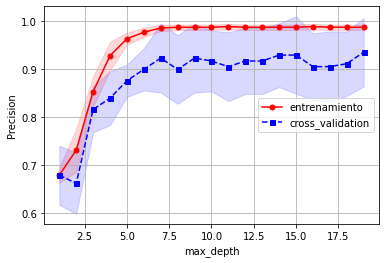

In [0]:
train_scores, cv_scores = validation_curve(tree, X_train_transformed, y_train, param_name='max_depth', param_range= np.arange(1,20), cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)
cv_scores_std = np.std(cv_scores, axis=1)

# graficando las curvas
plt.plot(np.arange(1,20), train_scores_mean, color='r', marker='o', markersize=5, label='entrenamiento')
plt.fill_between(np.arange(1,20), train_scores_mean + train_scores_std, train_scores_mean - train_scores_std, alpha=0.15, color='r')
plt.plot(np.arange(1,20), cv_scores_mean, color='b', linestyle='--', marker='s', markersize=5, label='cross_validation')
plt.fill_between(np.arange(1,20), cv_scores_mean + cv_scores_std, cv_scores_mean - cv_scores_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('max_depth')
plt.ylabel('Precision')
plt.show()



In [0]:
from sklearn.svm import SVC

#Calculamos los parámetros óptimos mediante GridSeach
param_grid = {'C': [1,100000],'gamma':[0.1 , 0.01 , 0.001]}
model = GridSearchCV(SVC(), param_grid, cv=5)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
model.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1, 'gamma': 0.001}

In [0]:
svc = SVC(C=1, kernel='rbf',gamma=0.001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X_train, y_train, cv=5)
print('Accuracy del conjunto validacion: {:.4f}'.format(np.array(scores).max()))

Accuracy del conjunto validacion: 1.0000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(np.array(y_test),y_pred)
print(conf)

[[29  3]
 [ 3 37]]


In [0]:
#Evaluamos las prestaciones de nuestro clasificador
VN, FP, FN, VP = conf.ravel()

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP /(VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad del test es de:",specificity)

La tasa de acierto del test es de: 0.9166666666666666
La sensibilidad del test es de: 0.925
La especificidad del test es de: 0.90625


In [0]:
t = np.arange(0,len(y_pred))
plt.figure(figsize=(10,5))
plt.plot(t,y_test)
#plt.plot(t,HR,linewidth=0.5)
plt.xlabel('Time [hora]')
plt.ylabel('HR')
print(len(y_pred))